In [ ]:
#Programming question 1: DBScan and KMeans

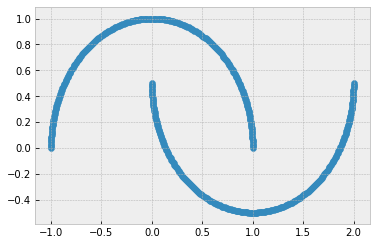

In [30]:
%matplotlib inline

#implementing for dataset 1

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#importing data
col_names=('Header_1','Header_2')

df=pd.read_csv('J:\MTech Notes\FOML\Assignments\Assignment 5\dataset1.txt',names=col_names,sep=' ')

plt.scatter(df['Header_1'],df['Header_2'])
plt.show()

Text(0, 0.5, 'WCSS')

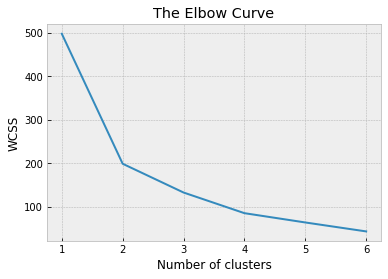

In [31]:
%matplotlib inline

#determining no. of clusters suitable usinf Elbow curve method
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(df)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')


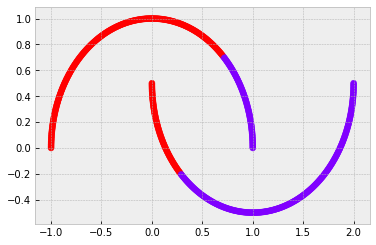

In [32]:
#from above plot no. of clusters =2

kmeans = KMeans(2)
kmeans.fit(df)

identified_clusters = kmeans.fit_predict(df)
identified_clusters

data_with_clusters = df.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['Header_1'],data_with_clusters['Header_2'],c=data_with_clusters['Clusters'],cmap='rainbow')


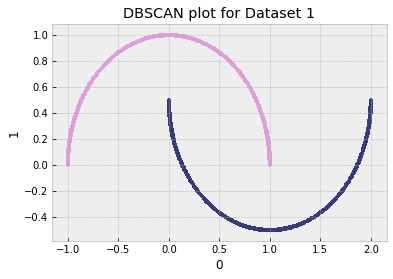

In [33]:
#implementing DBScan

from queue import Queue

class dbscan():
    def __init__(self,df, epsilon=1, min_points=5):
        self.df = np.array(df)
        self.epsilon = epsilon
        self.min_points = min_points
        self.cluster_label = 0
        self.noise = 0
        
    def fit(self):
        "Fitting data and creating labels column initialized to -1 (unclassified)"
        
        self.df = np.append(self.df, np.array([[-1]*len(df)]).reshape(-1,1), axis=1)
        
        for x in range(len(self.df)):
            
            # search for neighbours if point not labelled and if less neighbors than min_points then label as noise and continue
            if self.df[x,2] != -1:
                continue
            p = self.df[x,:2]
            neighbors = self.rangeQuery(p)
            if len(neighbors) < self.min_points:
                self.df[x,2] = self.noise
                continue
            self.cluster_label += 1

            # set current row to new cluster label and create seed set to hold all neighbors of cluster including the neighbors already found
            self.df[x,2] = self.cluster_label 
            found_neighbors = neighbors
            
            # creating queue to fold all neighbors of cluster and adding original neighbors
            q = Queue()
            for x in neighbors:
                q.put(x)
            while q.empty() == False:
                
                current = q.get()
                if self.df[current,2] == 0:
                    self.df[current,2] = self.cluster_label
                # If label is not -1(unclassified) then continue
                if self.df[current,2] != -1:
                    continue
                self.df[current,2] = self.cluster_label
                point = self.df[current,:2]
                neighbors2 = self.rangeQuery(point)
                
 # if neighbors2 >= min_points then add those neighbors to seed_set
                if len(neighbors2) >= self.min_points:

                    for x in neighbors2:
                        if x not in found_neighbors:
                            q.put(x)
                            found_neighbors.append(x)                           
    
    def predict(sef, x):
        #Return the predicted labels
        preds = []
        for point in x:
            neighbors = sef.rangeQuery(point)
            label = sef.df[neighbors[0],2]
            preds.append(label)
        
        return preds
    
    def rangeQuery(sef, x):
        #Query database against x and return all points that are <= epsilon
        neighbors = []
        for y in range(len(sef.df)):
            q = sef.df[y, :2]
            if sef.dist(x, q) <= sef.epsilon:
                neighbors.append(y)
        
        return neighbors
    
    def dist(self, point1, point2):
        #Euclid distance function
        x1 = point1[0]
        x2 = point2[0]
        y1 = point1[1]
        y2 = point2[1] 
        p1 = (x1 - x2)**2
        p2 = (y1 - y2)**2

        return np.sqrt(p1 + p2) 


test = dbscan(df, 0.2, 5)
test.fit()

plt.style.use("bmh")
pd.DataFrame(test.df).plot(x=0, y=1, kind="scatter",c=2, colorbar=False, title= "DBSCAN plot for Dataset 1", marker="+", colormap="tab20b")
plt.show()


In [34]:
#implementing for dataset 2

#loading data
df=pd.read_csv('J:\MTech Notes\FOML\Assignments\Assignment 5\dataset2.txt',names=col_names,sep=' ')

#plt.scatter(df['Header_1'],df['Header_2'])

Text(0, 0.5, 'WCSS')

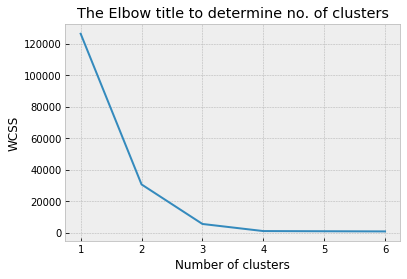

In [35]:
%matplotlib inline

#using elbow curve method to find no. of clusters

from sklearn.cluster import KMeans

wcss=[]
for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(df)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title to determine no. of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

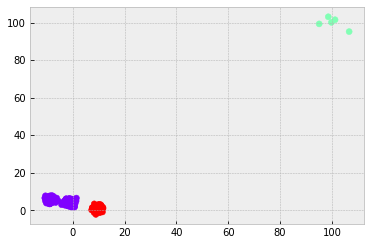

In [36]:
#from above plot no. of clusters =3

kmeans = KMeans(3)
kmeans.fit(df)

identified_clusters = kmeans.fit_predict(df)
identified_clusters

data_with_clusters = df.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['Header_1'],data_with_clusters['Header_2'],c=data_with_clusters['Clusters'],cmap='rainbow')


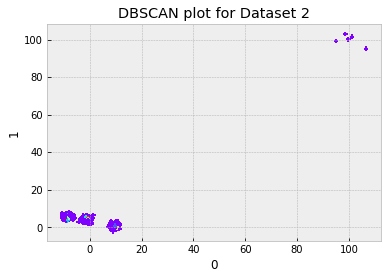

In [37]:
from queue import Queue

class dbscan():
    def __init__(self,df, epsilon=1, min_points=5):
        self.df = np.array(df)
        self.epsilon = epsilon
        self.min_points = min_points
        self.cluster_label = 0
        self.noise = 0
        
    def fit(self):
        "Fitting data and creating labels column initialized to -1 (unclassified)"
        
        self.df = np.append(self.df, np.array([[-1]*len(df)]).reshape(-1,1), axis=1)
        
        for x in range(len(self.df)):
            
            # search for neighbours if point not labelled and if less neighbors than min_points then label as noise and continue
            if self.df[x,2] != -1:
                continue
            p = self.df[x,:2]
            neighbors = self.rangeQuery(p)
            if len(neighbors) < self.min_points:
                self.df[x,2] = self.noise
                continue
            self.cluster_label += 1

            # set current row to new cluster label and create seed set to hold all neighbors of cluster including the neighbors already found
            self.df[x,2] = self.cluster_label 
            found_neighbors = neighbors
            
            # creating queue to fold all neighbors of cluster and adding original neighbors
            q = Queue()
            for x in neighbors:
                q.put(x)
            while q.empty() == False:
                
                current = q.get()
                if self.df[current,2] == 0:
                    self.df[current,2] = self.cluster_label
                # If label is not -1(unclassified) then continue
                if self.df[current,2] != -1:
                    continue
                self.df[current,2] = self.cluster_label
                point = self.df[current,:2]
                neighbors2 = self.rangeQuery(point)
                
 # if neighbors2 >= min_points then add those neighbors to seed_set
                if len(neighbors2) >= self.min_points:

                    for x in neighbors2:
                        if x not in found_neighbors:
                            q.put(x)
                            found_neighbors.append(x)                           
    
    def predict(sef, x):
        #Return the predicted labels
        preds = []
        for point in x:
            neighbors = sef.rangeQuery(point)
            label = sef.df[neighbors[0],2]
            preds.append(label)
        
        return preds
    
    def rangeQuery(sef, x):
        #Query database against x and return all points that are <= epsilon
        neighbors = []
        for y in range(len(sef.df)):
            q = sef.df[y, :2]
            if sef.dist(x, q) <= sef.epsilon:
                neighbors.append(y)
        
        return neighbors
    
    def dist(self, point1, point2):
        #Euclid distance function
        x1 = point1[0]
        x2 = point2[0]
        y1 = point1[1]
        y2 = point2[1] 
        p1 = (x1 - x2)**2
        p2 = (y1 - y2)**2

        return np.sqrt(p1 + p2)


test = dbscan(df, 0.2, 5)
test.fit()

plt.style.use("bmh")
pd.DataFrame(test.df).plot(x=0, y=1, kind="scatter",c=2, colorbar=False, title= "DBSCAN plot for Dataset 2", marker="+",cmap='rainbow')
plt.show()
